# Print scala version used by this notebook

In [6]:
val list = List(12,3,4)

list: List[Int] = List(12, 3, 4)

In [7]:
println(s"""using scala version: ${scala.util.Properties.scalaPropOrElse("version.number", "unknown")}""")

using scala version: 2.11.11


# Import project's library

First you need to publis it into local *ivy* repository by calling 

```
sbt clean test publishLocal
```

**<font color='red'>! After changes in library you need to restart kernel</font>**


In [1]:
//workaround to load tensorflow_2.11-0.1.1-SNAPSHOT-linux-cpu-x86_64.jar
//by default ammonium can't resolve this artifact :|

new {
    val userHome = System.getProperty("user.home")
    val tesnsorflowV = "0.1.1-SNAPSHOT"
    val scalaV = "2.11"
    val pathToJar = s"$userHome/.coursier/cache/v1/https/oss.sonatype.org/content/repositories/snapshots/org/platanios/tensorflow_$scalaV/$tesnsorflowV/tensorflow_$scalaV-$tesnsorflowV-linux-cpu-x86_64.jar"
    interp.load.cp(
      Seq(
        ammonite.ops.Path(pathToJar)
      )
    )
}

val ossSnapshots = ammonite.runtime.tools.Resolver.Http(
  "oss-snapshots",
  "https://oss.sonatype.org/content/repositories/snapshots", //trailing slash!
  ammonite.runtime.tools.Resolvers.IvyPattern,
  true
)

interp.resolvers() = interp.resolvers() :+ ossSnapshots


res0_0: {val userHome: String;val tesnsorflowV: String;val scalaV: String;val pathToJar: String} = $sess.cmd0Wrapper$Helper$$anon$1@2d0e3719
ossSnapshots: Resolver.Http = Http(
  "oss-snapshots",
  "https://oss.sonatype.org/content/repositories/snapshots",
  "[organisation]/[module]/(scala_[scalaVersion]/)(sbt_[sbtVersion]/)[revision]/[type]s/[artifact](-[classifier]).[ext]",
  true,
  None
)

In [5]:
//this must be in seperate cell than defining resolver !

import $ivy.`ml-worthing::introtoml:0.1-SNAPSHOT`
import mlworthing._
import plotly.Extra._

import org.platanios.tensorflow.api
import org.platanios.tensorflow.api._
import org.platanios.tensorflow.api.core.client.FeedMap

import plotly._
import plotly.element._
import plotly.layout._
import plotly.JupyterScala._
import plotly.element.Orientation._

plotly.JupyterScala.init()

import $ivy.$                                    

import mlworthing._

import plotly.Extra._


import org.platanios.tensorflow.api

import org.platanios.tensorflow.api._

import org.platanios.tensorflow.api.core.client.FeedMap


import plotly._

import plotly.element._

import plotly.layout._

import plotly.JupyterScala._

import plotly.element.Orientation._



In [6]:
//this is how to import script
import $file.Commons

mlworthing.test

Compiling Commons.sc


import $file.$      


res5_1: String = "mlworthing package object 2"

## showTable() - prints arrays as HTML


In [8]:
Array(5.3223,2.343,4,56,7,3,4.00,-1.00).showTable("some numbers")
Array(
  Array('c', 123, 0.001),
  Array('b', 555, 0.003),
  Array('e', 666, 0.006)    
).showTable("char", "number", "some value")


some numbers
5.3223
2.343
4.0
56.0
7.0
3.0
4.0
-1.0


char,number,some value
99.0,123.0,0.001
98.0,555.0,0.003
101.0,666.0,0.006


## Pipe Operator

In [9]:
"Worthing is awesome ❤️❤️❤️❤️❤️" |> publish.html

Worthing is awesome ❤️❤️❤️❤️❤️

## Plotting

### plotty
* https://github.com/alexarchambault/plotly-scala
* https://alexarchambault.github.io/plotly-scala/
* https://images.plot.ly/plotly-documentation/images/plotly_js_cheat_sheet.pdf
* doc https://plot.ly/javascript/

* **<font color='red'>requires custom plotly scala build**</font>
    * fork here: https://github.com/pawelpanasewicz/plotly-scala
    * how to publish: `sbt ++2.11.8 clean publishLocal`


In [7]:
import $ivy.`org.plotly-scala::plotly-jupyter-scala:0.3.4-SNAPSHOT`

import plotly._
import plotly.element._
import plotly.layout._
import plotly.JupyterScala._
import plotly.element.Orientation._


plotly.JupyterScala.init()

new {
    val (x, y) = Seq(
      "Banana" -> 10,
      "Apple" -> 8,
      "Grapefruit" -> 15
    ).unzip

    Bar(x, y).plot()

}

new {
    val x1 = (0.0 to 10.0 by 0.3)
    val y1 = x1.map(d => 2.0 * d + util.Random.nextGaussian())

    val x2 = (0.0 to 5.0 by 0.4)
    val y2 = x2.map(math.exp)

    val plot = Seq(
      Scatter(
        x1, y1,
        name = "Approx twice",
        mode = ScatterMode(ScatterMode.Markers)
      ),
      Scatter(
        x2, y2, 
        name = "Exp",
        mode = ScatterMode(ScatterMode.Markers)

      )
    )
    plot.plot()
}


import $ivy.$                                                      


import plotly._

import plotly.element._

import plotly.layout._

import plotly.JupyterScala._

import plotly.element.Orientation._



res6_7: {val x: Seq[String];val y: Seq[Int]} = $sess.cmd6Wrapper$Helper$$anon$1@5395be16
res6_8: {val x1: scala.collection.immutable.NumericRange[Double];val y1: scala.collection.immutable.IndexedSeq[Double];val x2: scala.collection.immutable.NumericRange[Double];val y2: scala.collection.immutable.IndexedSeq[Double];val plot: Seq[plotly.Scatter]} = $sess.cmd6Wrapper$Helper$$anon$3@35fdabbe

## calling javascript

In [8]:
publish.js("console.info('asdfasdf123')")

## using plotly.js API and updating graph
* http://www.mzan.com/article/35946484-most-performant-way-to-update-graph-with-new-data-with-plotly.shtml


In [16]:
  new {

    import mlworthing._
    import plotly.Extra._

    import mlworthing._
    import plotly.Extra._
    import scala.util.Random._

    val div = Scatter(
      List[Double](),
      List[Double](),
      marker = Marker(
        size = Seq()
      ),
      text = Seq(),
      name = "big brow fox"
    ).plot(title = "random numbers and circles")

    val words = "big brown fox jumps over the lazy dog".split(" ")
    //       waitForChart()
    (0 to 10) foreach { i =>
      Thread.sleep(100)
      val update = Update(
        x = Seq[Sequence](List(nextGaussian())),
        y = Seq[Sequence](List(nextGaussian())),
        `marker.size` = Seq[OneOrSeq[Int]](List(nextInt().abs % 100)),
        text = Seq(Seq(words(i % words.size)))
      )
      extendTraces(div, update, List(0))
    }
  }

res15: {val div: String;val words: Array[String]} = $sess.cmd15Wrapper$Helper$$anon$1@2c75e8f7

# Import library with classifier
* At the moment scala kernlel of jupyter doesn't support importing libs with classifiers (01-2018)
* https://github.com/jupyter-scala/jupyter-scala/issues/128
* It even doesn't allow to imprt it as transitive dependency
* Here is workaround for it

In particular this artifact contains so libararies
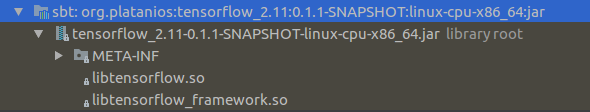

In [2]:
new {
    val userHome = System.getProperty("user.home")
    val pathPrefix = s"$userHome/.m2/repository"
    val tesnsorflowV = "0.1.1-SNAPSHOT"
    val scalaV = "2.11"
    val pathToJar = s"$userHome/.coursier/cache/v1/https/oss.sonatype.org/content/repositories/snapshots/org/platanios/tensorflow_$scalaV/$tesnsorflowV/tensorflow_$scalaV-$tesnsorflowV-linux-cpu-x86_64.jar"
    interp.load.cp(
      Seq(
        ammonite.ops.Path(pathToJar)
      )
    )
  }


res1: {val userHome: String;val pathPrefix: String;val tesnsorflowV: String;val scalaV: String;val pathToJar: String} = $sess.cmd1Wrapper$Helper$$anon$1@35f928a0